In [2]:
%load_ext autoreload
%autoreload 2

In [35]:
# @title notebook setup
#Mount drive
if 'colab' in str(get_ipython()):
    from google.colab import drive
    drive.mount('/content/drive')
    import sys
    sys.path.append('/content/drive/MyDrive/fnc_agrp_project/fnc_analysis_code')
    %cd /content/drive/MyDrive/fnc_agrp_project/fnc_analysis_code
    
from pre_processing import *
from scipy import stats as st
from statsmodels.stats.multitest import multipletests
import statsmodels.formula.api as smf
from pull_operant_data import write_data, pull_multiple
import os



raw_data =  Path('raw_data')
pre_processed = Path('pre_processed')

## normal intake data

In [3]:
# defining the data location
fpath_stim_glucose = raw_data/'normal_intake'/'stim'/'stim_glucose'
fpath_stim_fat = raw_data/'normal_intake'/'stim'/'stim_fat'
fpath_ctl_glucose = raw_data/'normal_intake'/'ctl'/'ctl_glucose'
fpath_ctl_fat = raw_data/'normal_intake'/'ctl'/'ctl_fat'

# necessary variables related to experiment setup for controls
ctl_setup = fpath_ctl_glucose/'ctl_glucose_setup.csv'
stim_setup = fpath_stim_glucose/'stim_glucose_setup.csv'

print('loading glucose stim')
training = FNCData(fpath_stim_glucose,['adm'],'training', stim_setup, n_sessions=2, loglevel=0)
testing = FNCData(fpath_stim_glucose,['adm'],'testing', stim_setup, loglevel=0)
pretesting = FNCData(fpath_stim_glucose,['adm'],'pretesting', stim_setup, n_sessions=2, loglevel=0)

print('loading glucose ctl')
ctl_training = FNCData(fpath_ctl_glucose,['adm'],'training', ctl_setup, n_sessions=2, loglevel=0)
ctl = FNCData(fpath_ctl_glucose,['adm'],'testing',ctl_setup, loglevel=0)
ctl_pretesting = FNCData(fpath_ctl_glucose,['adm'],'pretesting', ctl_setup,  n_sessions=2, loglevel=0)


# fat data
print('loading fat ctl')
ctl_fat_training = FNCData(fpath_ctl_fat,['adm'],'training',ctl_setup, n_sessions=2, loglevel=0)
ctl_fat = FNCData(fpath_ctl_fat,['adm'],'testing', ctl_setup, loglevel=0)
ctl_fat_pretesting = FNCData(fpath_ctl_fat,['adm'],'pretesting', ctl_setup, n_sessions=2, loglevel=0)


print('loading fat stim')
fat_stim_training = FNCData(fpath_stim_fat,['adm'],'training', stim_setup, n_sessions=2, loglevel=0)
fat_stim = FNCData(fpath_stim_fat,['adm'],'testing', stim_setup, loglevel=0)
stim_fat_pretesting = FNCData(fpath_stim_fat,['adm'],'pretesting', stim_setup, n_sessions=2, loglevel=0)

loading glucose stim
loading glucose ctl
loading fat ctl
loading fat stim


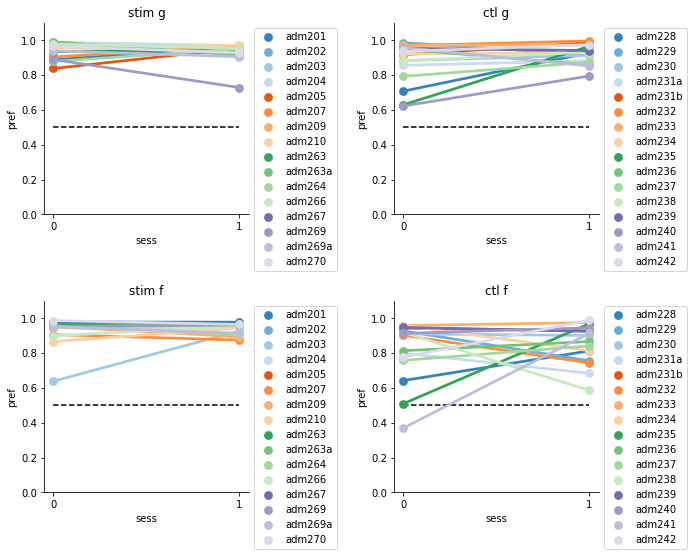

In [4]:
# pretesting validation
pretest_val_plots(stim_g=pretesting , ctl_g=ctl_pretesting, 
                  stim_f=stim_fat_pretesting, ctl_f=ctl_fat_pretesting)


### format and save data

In [5]:
df, dft = format_final_dataset(ctl_train_g = ctl_training, ctl_test_g = ctl, 
                         ctl_train_f = ctl_fat_training, ctl_test_f = ctl_fat, 
                         stim_train_g = training, stim_test_g = testing, 
                         stim_train_f = fat_stim_training, stim_test_f = fat_stim,
                         both_us = True, to_prune = True)
df.to_csv(pre_processed/'unlimited_intake'/'total_licks_normal_intake.csv')
dft.to_csv(pre_processed/'unlimited_intake'/'lick_times_normal_intake.csv')
display(df)
display(dft)

('adm239', 1, 'left')


CS+     CS-  sess sex    side  \
US      Chr2  mouse  phase    day CS                                     
fat     False adm228 test     0   +    Grape  Cherry   0.0   M   right   
                                  -    Grape  Cherry   0.0   M    left   
                              1   +    Grape  Cherry   0.0   M    left   
                                  -    Grape  Cherry   0.0   M   right   
                     training 0   +    Grape  Cherry   1.0   M  center   
...                                      ...     ...   ...  ..     ...   
glucose True  adm270 training 0   -   Cherry   Grape   0.0   M  center   
                              1   +   Cherry   Grape   0.0   M  center   
                                  -   Cherry   Grape   1.0   M  center   
                              2   +   Cherry   Grape   1.0   M  center   
                                  -   Cherry   Grape   0.0   M  center   

                                     total_licks  
US      Chr2  mouse  phase    day CS              
fat     False adm228 test     0   +        215.0  
                                  -        440.0  
                              1   +        562.0  
                                  -        350.0  
                     training 0   +        183.0  
...                                          ...  
glucose True  adm270 training 0   -        786.0  
                              1   +       2058.0  
                                  -       2507.0  
                              2   +       2877.0  
                                  -       2312.0  

[580 rows x 6 columns]

sess     time sex     CS+  \
US      Chr2  mouse  phase    day CS lick_number                              
fat     False adm228 test     0   +  0               0    25.89   M   Grape   
                                     1               0    25.97   M   Grape   
                                     2               0    26.08   M   Grape   
                                     3               0    26.17   M   Grape   
                                     4               0    26.28   M   Grape   
...                                                ...      ...  ..     ...   
glucose True  adm270 training 2   -  2307            0  1795.60   M  Cherry   
                                     2308            0  1795.76   M  Cherry   
                                     2309            0  1796.01   M  Cherry   
                                     2310            0  1796.19   M  Cherry   
                                     2311            0  1796.41   M  Cherry   

                                                     CS-    side  
US      Chr2  mouse  phase    day CS lick_number                  
fat     False adm228 test     0   +  0            Cherry   right  
                                     1            Cherry   right  
                                     2            Cherry   right  
                                     3            Cherry   right  
                                     4            Cherry   right  
...                                                  ...     ...  
glucose True  adm270 training 2   -  2307          Grape  center  
                                     2308          Grape  center  
                                     2309          Grape  center  
                                     2310          Grape  center  
                                     2311          Grape  center  

[569836 rows x 6 columns]

##  limited intake data

In [6]:
#@title fixing a data saving issue for habituation
# f = raw_data/'limited_intake'/'stim'/'stim_ltd_fat'/'pretesting'/'20211017'
# d = pull_data(f/'20211017_adm428_adm429_ntn431_ntn433_adm434_adm435_adm436_adm437_pretest_AM_05_right_025_left'/'raw'/'Subject_adm428_Experiment__Group_.txt')
# s1_2_dest = f/'20211017_adm428_adm429_ntn431_ntn433_adm434_adm435_adm436_adm437_pretest_AM_05_right_025_left'
# print(s1_2_dest)
# for i in d:
#     print(len(d[i]),d[i][0]['subject'])
#     write_data(s1_2_dest/(d[i][0]['subject'] + '.txt'), d[i][0])
# s2_2_dest = f/'20211017_adm428_adm429_ntn431_ntn433_adm434_adm435_adm436_adm437_pretest_PM_025_right_05_left'
# print(s2_2_dest)
# for i in d:
#     print(len(d[i]),d[i][-1]['subject'])
#     write_data(s2_2_dest/(d[i][-1]['subject'] + '.txt'), d[i][-1])
# s2_1_dest = f/'20211017_ntn420_ntn421_ntn422_ntn423_ntn424_adm426_adm427_pretest_PM_025_right_05_left'
# print(s2_1_dest)
# for i in d:
#     if len(d[i]) == 3:
#         print(len(d[i]),d[i][1]['subject'])
#         write_data(s2_1_dest/(d[i][1]['subject']+'.txt'), d[i][1])

In [7]:
# defining the data location
fpath_stim_lmtd_g = raw_data/'limited_intake'/'stim'/'stim_ltd_glucose'
fpath_stim_lmtd_f= raw_data/'limited_intake'/'stim'/'stim_ltd_fat'
fpath_ctl_lmtd_g = raw_data/'limited_intake'/'ctl'/'ctl_ltd_glucose'
fpath_ctl_lmtd_f = raw_data/'limited_intake'/'ctl'/'ctl_ltd_fat'

# necessary variables related to experiment setup for controls
ctl_g_setup = fpath_ctl_lmtd_g/'ctl_ltd_glucose_setup.csv'
stim_g_setup = fpath_stim_lmtd_g/'stim_glucose_ltd_setup.csv'
ctl_f_setup = fpath_ctl_lmtd_f/'ctl_ltd_fat_setup.csv'
stim_f_setup = fpath_stim_lmtd_f/'stim_fat_ltd_setup.csv'

print('loading glucose ctl...')
lmtd_ctl_training = FNCData(fpath_ctl_lmtd_g, ['adm','ntn'], 'training', ctl_g_setup , n_sessions=2, loglevel=0)
lmtd_ctl = FNCData(fpath_ctl_lmtd_g, ['adm','ntn'], 'testing', ctl_g_setup , loglevel=0)
ctl_ltd_pretesting = FNCData(fpath_ctl_lmtd_g, ['adm','ntn'], 'pretesting', ctl_g_setup, n_sessions=2, loglevel=0)

print('loading glucose stim...')
lmtd_stim_training = FNCData(fpath_stim_lmtd_g, ['adm','ntn'], 'training', stim_g_setup , n_sessions=2, loglevel=0)
lmtd_stim=FNCData(fpath_stim_lmtd_g, ['adm','ntn'], 'testing', stim_g_setup , loglevel=0)
ltd_pretesting = FNCData(fpath_stim_lmtd_g, ['adm','ntn'], 'pretesting', stim_g_setup , n_sessions=2, loglevel=0)

print('loading fat ctl...')
lmtd_ctl_training_fat = FNCData(fpath_ctl_lmtd_f, ['adm','ntn'], 'training',ctl_f_setup ,n_sessions=2, loglevel=0)
lmtd_ctl_fat = FNCData(fpath_ctl_lmtd_f, ['adm','ntn'],'testing', ctl_f_setup , loglevel=0)
ctl_ltd_fat_pretesting = FNCData(fpath_ctl_lmtd_f, ['adm','ntn'], 'pretesting',ctl_f_setup ,n_sessions=2, loglevel=0)


print('loading fat stim...')
lmtd_stim_training_fat = FNCData(fpath_stim_lmtd_f, ['adm','ntn'], 'training', stim_f_setup , n_sessions=2, loglevel=0)
lmtd_stim_fat=FNCData(fpath_stim_lmtd_f, ['adm','ntn'],'testing', stim_f_setup, loglevel=0 )
stim_ltd_fat_pretesting = FNCData(fpath_stim_lmtd_f, ['adm','ntn'], 'pretesting', stim_f_setup , n_sessions=2, loglevel=0)

loading glucose ctl...
loading glucose stim...
loading fat ctl...
loading fat stim...


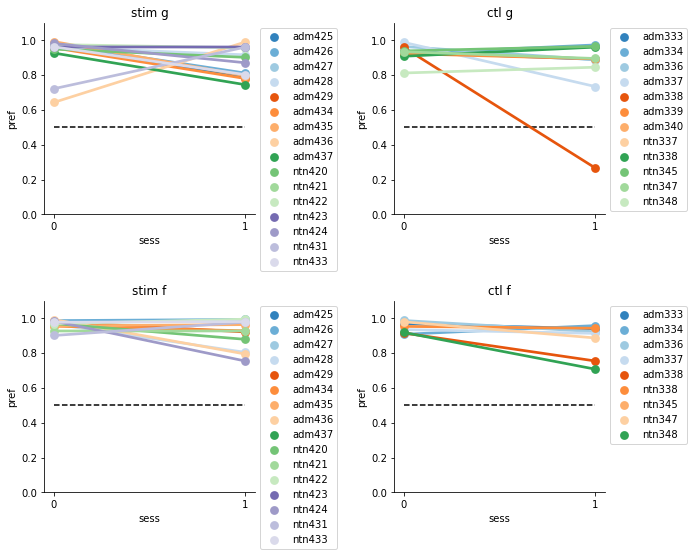

In [8]:
# pretesting validation
pretest_val_plots(stim_g=ltd_pretesting, ctl_g=ctl_ltd_pretesting, 
                  stim_f=stim_ltd_fat_pretesting, ctl_f=ctl_ltd_fat_pretesting)



### format and save data

In [9]:
#dropping bad mice
#422 and 431 were on box 3 where the pump was working unreliably
#423 had a leak in the line on training day 3 both for fat and glucose
#433 had a leak in the line on the last day of training for glucose

df, dft = format_final_dataset(ctl_train_g = lmtd_ctl_training, ctl_test_g = lmtd_ctl, 
                         ctl_train_f = lmtd_ctl_training_fat, ctl_test_f = lmtd_ctl_fat, 
                         stim_train_g = lmtd_stim_training, stim_test_g = lmtd_stim, 
                         stim_train_f = lmtd_stim_training_fat, stim_test_f = lmtd_stim_fat,
                         both_us = True, to_prune = True, drop = ['ntn422','ntn423','ntn431', 'ntn433'])

df.to_csv(pre_processed/'limited_intake'/'total_licks_limited_intake.csv')
dft.to_csv(pre_processed/'limited_intake'/'lick_times_limited_intake.csv')

display(df)
display(dft)

('adm425', 1, 'left')


CS+     CS-  sess sex    side  \
US      Chr2  mouse  phase    day CS                                         
fat     False adm333 test     0   +       Cherry   Grape   0.0   M   right   
                                  -       Cherry   Grape   0.0   M    left   
                              1   +       Cherry   Grape   0.0   M    left   
                                  -       Cherry   Grape   0.0   M   right   
                     training 0   +       Cherry   Grape   1.0   M  center   
...                                          ...     ...   ...  ..     ...   
glucose True  ntn424 training 0   -   lemon-lime  orange   0.0   M  center   
                              1   +   lemon-lime  orange   0.0   M  center   
                                  -   lemon-lime  orange   1.0   M  center   
                              2   +   lemon-lime  orange   1.0   M  center   
                                  -   lemon-lime  orange   0.0   M  center   

                                     total_licks  
US      Chr2  mouse  phase    day CS              
fat     False adm333 test     0   +       3304.0  
                                  -         50.0  
                              1   +       2117.0  
                                  -        400.0  
                     training 0   +        704.0  
...                                          ...  
glucose True  ntn424 training 0   -        341.0  
                              1   +        592.0  
                                  -        504.0  
                              2   +        517.0  
                                  -        612.0  

[280 rows x 6 columns]

sess    time sex  \
US      Chr2  mouse  phase    day CS lick_number                     
fat     False adm333 test     0   +  0               0   42.93   M   
                                     1               0   43.19   M   
                                     2               0   43.32   M   
                                     3               0   43.45   M   
                                     4               0   43.58   M   
...                                                ...     ...  ..   
glucose True  ntn424 training 2   -  607             0  848.60   M   
                                     608             0  852.44   M   
                                     609             0  852.59   M   
                                     610             0  869.10   M   
                                     611             0  869.55   M   

                                                         CS+     CS-    side  
US      Chr2  mouse  phase    day CS lick_number                              
fat     False adm333 test     0   +  0                Cherry   Grape   right  
                                     1                Cherry   Grape   right  
                                     2                Cherry   Grape   right  
                                     3                Cherry   Grape   right  
                                     4                Cherry   Grape   right  
...                                                      ...     ...     ...  
glucose True  ntn424 training 2   -  607          lemon-lime  orange  center  
                                     608          lemon-lime  orange  center  
                                     609          lemon-lime  orange  center  
                                     610          lemon-lime  orange  center  
                                     611          lemon-lime  orange  center  

[177625 rows x 6 columns]

## sated limited intake data

In [10]:
#@title cleaning up a mistake in data saving for fat
# fld = raw_data/'sated_limited'/'ctl'/'ctl_sated_ltd_fat'/'testing'/'20220115'/'20220115_av2_av3_ntn472_ntn475_ntn474_ntn476_testing1'/'raw'

# h1 = list(filter( lambda x: re.findall('..Group', x.name)[0][0]!='2',  list(fld.iterdir())))
# h1 = dict(zip(list(map(lambda x: re.findall('Subject.......',x.name)[0],h1)), h1))

# h2 = list(filter( lambda x: re.findall('..Group', x.name)[0][0]=='2',  list(fld.iterdir())))
# h2 = dict(zip(list(map(lambda x: re.findall('Subject.......',x.name)[0],h2)), h2))

# for i in h1:
#     d = pull_data(h1[i])
#     d2 = pull_data(h2[i])

#     bx = list(d.keys())[0]
#     d[bx][-1]['a'] += d2[bx][-1]['a']
#     d[bx][-1]['b'] += d2[bx][-1]['b']

#     d[bx][-1]['l'] = np.concatenate((d[bx][-1]['l'],1800 + d2[bx][-1]['l']), axis = 1)
#     d[bx][-1]['r'] = np.concatenate((d[bx][-1]['r'],1800 + d2[bx][-1]['r']), axis = 1)

#     d[bx][-1]['end'] = d2[bx][-1]['end']
#     n= h1[i].name
#     n = n[:-4] + '3.txt'
#     fname = h1[i].parent.parent/n

#     write_data(fname, d[bx][-1])

In [12]:
# defining the data location
fpath_stim_sat_lmtd_g = raw_data/'unused'/'sated_limited'/'stim'/'stim_sated_ltd_glucose'
fpath_ctl_sat_lmtd_g = raw_data/'unused'/'sated_limited'/'ctl'/'ctl_sated_ltd_glucose'
fpath_ctl_sat_lmtd_f = raw_data/'unused'/'sated_limited'/'ctl'/'ctl_sated_ltd_fat'
fpath_stim_sat_lmtd_f = raw_data/'unused'/'sated_limited'/'stim'/'stim_sated_ltd_fat'


# necessary variables related to experiment setup for controls
ctl_g_setup = fpath_ctl_sat_lmtd_g/'ctl_sated_ltd_glucose_setup.csv'
stim_g_setup = fpath_stim_sat_lmtd_g/'stim_sated_ltd_glucose_setup.csv'
ctl_f_setup = fpath_ctl_sat_lmtd_f/'ctl_sated_ltd_fat_setup.csv'
stim_f_setup = fpath_stim_sat_lmtd_f/'stim_sated_ltd_fat_setup.csv'

print('loading glucose ctl...')
ctl_sat_ltd_training = FNCData(fpath_ctl_sat_lmtd_g, ['av','ntn'], 'training', ctl_g_setup, n_sessions=2, loglevel=0)
ctl_sat_ltd = FNCData(fpath_ctl_sat_lmtd_g, ['av','ntn'], 'testing', ctl_g_setup, loglevel=0)
ctl_sat_ltd_pretesting = FNCData(fpath_ctl_sat_lmtd_g, ['av','ntn'], 'pretesting', ctl_g_setup, n_sessions=2, loglevel=0)


print('loading glucose stim..')
stim_sat_ltd_training = FNCData(fpath_stim_sat_lmtd_g, ['ntn'], 'training', stim_g_setup, n_sessions=2, loglevel=0)
stim_sat_ltd = FNCData(fpath_stim_sat_lmtd_g, ['ntn'], 'testing', stim_g_setup, loglevel=0)
stim_sat_ltd_pretesting= FNCData(fpath_stim_sat_lmtd_g, ['ntn'], 'pretesting', stim_g_setup, n_sessions=2, loglevel=0)

print('loading fat ctl..')
ctl_sat_ltd_training_f = FNCData(fpath_ctl_sat_lmtd_f, ['av','ntn'], 'training', ctl_f_setup , n_sessions=2, loglevel=0)
ctl_sat_ltd_f = FNCData(fpath_ctl_sat_lmtd_f, ['av','ntn'], 'testing', ctl_f_setup , loglevel=0)
ctl_sat_ltd_pretesting_f = FNCData(fpath_ctl_sat_lmtd_f, ['av','ntn'], 'pretesting', ctl_f_setup , n_sessions=2, loglevel=0)


print('loading fat stim..')
stim_sat_ltd_training_f = FNCData(fpath_stim_sat_lmtd_f, ['ntn'], 'training', stim_f_setup , n_sessions=2,loglevel=0)
stim_sat_ltd_f = FNCData(fpath_stim_sat_lmtd_f, ['ntn'], 'testing', stim_f_setup ,loglevel=0)
stim_sat_ltd_pretesting_f = FNCData(fpath_stim_sat_lmtd_f, ['ntn'], 'pretesting', stim_f_setup , n_sessions=2,loglevel=0)


loading glucose ctl...
loading glucose stim..
loading fat ctl..
loading fat stim..


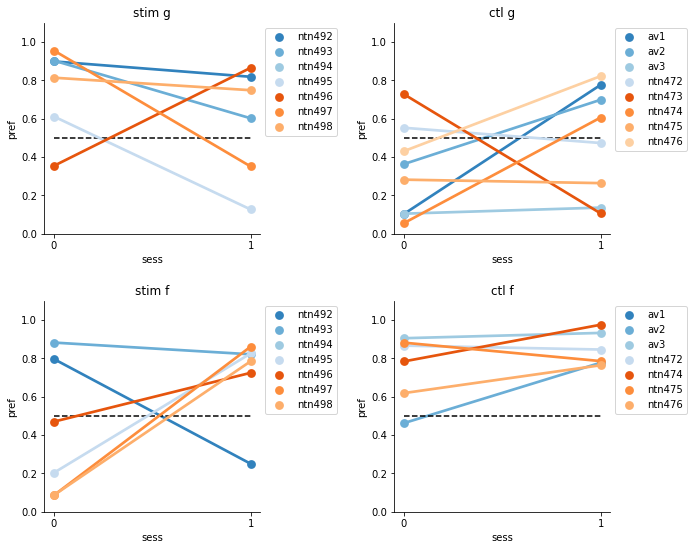

In [13]:
# pretesting validation

# we had to rerun pretesting in this cohort. let's select only the second pretesting day
stim_sat_ltd_pretesting.total_left_licks = stim_sat_ltd_pretesting.total_left_licks.iloc[:,-2:]
stim_sat_ltd_pretesting.total_left_licks.columns = [0,1]
stim_sat_ltd_pretesting.total_right_licks = stim_sat_ltd_pretesting.total_right_licks.iloc[:,-2:]
stim_sat_ltd_pretesting.total_right_licks.columns = [0,1]


stim_sat_ltd_pretesting_f.total_left_licks = stim_sat_ltd_pretesting_f.total_left_licks.iloc[:,-2:]
stim_sat_ltd_pretesting_f.total_left_licks.columns = [0,1]
stim_sat_ltd_pretesting_f.total_right_licks = stim_sat_ltd_pretesting_f.total_right_licks.iloc[:,-2:]
stim_sat_ltd_pretesting_f.total_right_licks.columns = [0,1]

pretest_val_plots(stim_g=stim_sat_ltd_pretesting, ctl_g=ctl_sat_ltd_pretesting, 
                  stim_f=stim_sat_ltd_pretesting_f, ctl_f=ctl_sat_ltd_pretesting_f)


### format and save data

In [14]:
df, dft = format_final_dataset(ctl_train_g = ctl_sat_ltd_training, 
                               ctl_test_g  = ctl_sat_ltd, 
                               ctl_train_f = ctl_sat_ltd_training_f, 
                               ctl_test_f  = ctl_sat_ltd_f, 
                               stim_train_g = stim_sat_ltd_training, 
                               stim_test_g  = stim_sat_ltd, 
                               stim_train_f = stim_sat_ltd_training_f, 
                               stim_test_f  = stim_sat_ltd_f,
                               both_us = True, to_prune = True)

df.to_csv(pre_processed/'unused'/'sated_limited'/'total_licks_sated_limited.csv')
dft.to_csv(pre_processed/'unused'/'sated_limited'/'lick_times_sated_limited.csv')

display(df)
display(dft)

('ntn495', 0, 'left')


CS+     CS-  sess sex    side  \
US      Chr2 mouse  phase    day CS                                         
fat     True ntn492 test     0   +   Lemon Lime  Orange   0.0   M   right   
                                 -   Lemon Lime  Orange   0.0   M    left   
                             1   +   Lemon Lime  Orange   0.0   M    left   
                                 -   Lemon Lime  Orange   0.0   M   right   
                    training 0   +   Lemon Lime  Orange   1.0   M  center   
...                                         ...     ...   ...  ..     ...   
glucose True ntn498 training 0   -       Cherry   Grape   0.0   M  center   
                             1   +       Cherry   Grape   0.0   M  center   
                                 -       Cherry   Grape   1.0   M  center   
                             2   +       Cherry   Grape   1.0   M  center   
                                 -       Cherry   Grape   0.0   M  center   

                                    total_licks  
US      Chr2 mouse  phase    day CS              
fat     True ntn492 test     0   +          8.0  
                                 -         37.0  
                             1   +        374.0  
                                 -        410.0  
                    training 0   +         95.0  
...                                         ...  
glucose True ntn498 training 0   -         50.0  
                             1   +         67.0  
                                 -        127.0  
                             2   +         67.0  
                                 -         46.0  

[100 rows x 6 columns]

sess    time sex         CS+  \
US      Chr2 mouse  phase    day CS lick_number                                 
fat     True ntn492 test     0   +  0               0  252.41   M  Lemon Lime   
                                    1               0  252.50   M  Lemon Lime   
                                    2               0  252.61   M  Lemon Lime   
                                    3               0  252.73   M  Lemon Lime   
                                    4               0  252.86   M  Lemon Lime   
...                                               ...     ...  ..         ...   
glucose True ntn498 training 2   -  41              0  201.16   M      Cherry   
                                    42              0  201.29   M      Cherry   
                                    43              0  201.93   M      Cherry   
                                    44              0  202.06   M      Cherry   
                                    45              0  202.31   M      Cherry   

                                                    CS-    side  
US      Chr2 mouse  phase    day CS lick_number                  
fat     True ntn492 test     0   +  0            Orange   right  
                                    1            Orange   right  
                                    2            Orange   right  
                                    3            Orange   right  
                                    4            Orange   right  
...                                                 ...     ...  
glucose True ntn498 training 2   -  41            Grape  center  
                                    42            Grape  center  
                                    43            Grape  center  
                                    44            Grape  center  
                                    45            Grape  center  

[21462 rows x 6 columns]

## sated unlimited intake data - (first try)

In [15]:
# defining the data location
fpath_ctl_sat_g = raw_data/'unused'/'sated1'/'ctl'/'ctl_sated_glucose'
fpath_ctl_sat_f = raw_data/'unused'/'sated1'/'ctl'/'ctl_sated_fat'
fpath_stim_sat_g = raw_data/'unused'/'sated1'/'stim'/'stim_sated_glucose'
fpath_stim_sat_f = raw_data/'unused'/'sated1'/'stim'/'stim_sated_fat'


# necessary variables related to experiment setup for controls
ctl_g_setup = fpath_ctl_sat_g/'ctl_sated_glucose_setup.csv'
ctl_f_setup = fpath_ctl_sat_f/'ctl_sated_fat_setup.csv'
stim_g_setup = fpath_stim_sat_g/'stim_sated_glucose_setup.csv'
stim_f_setup = fpath_stim_sat_f/'stim_sated_fat_setup.csv'


print('loading glucose ctl...')
ctl_sat_training = FNCData(fpath_ctl_sat_g, ['av','ntn'], 'training', ctl_g_setup, n_sessions=2, loglevel=0)
ctl_sat = FNCData(fpath_ctl_sat_g, ['av','ntn'], 'testing', ctl_g_setup, loglevel=0)
ctl_sat_pretesting = FNCData(fpath_ctl_sat_g, ['av','ntn'], 'pretesting', ctl_g_setup, n_sessions=2, loglevel=0)

print('loading fat ctl...')
ctl_sat_f_training = FNCData(fpath_ctl_sat_f, ['av','ntn'], 'training', ctl_f_setup, n_sessions=2, loglevel=0)
ctl_sat_f = FNCData(fpath_ctl_sat_f, ['av','ntn'], 'testing', ctl_f_setup, loglevel=0)
ctl_sat_f_pretesting = FNCData(fpath_ctl_sat_f, ['av','ntn'], 'pretesting', ctl_f_setup, n_sessions=2, loglevel=0)

print('loading glucose stim...')
stim_sat_training = FNCData(fpath_stim_sat_g, ['ntn'], 'training', stim_g_setup, n_sessions=2, loglevel=0)
stim_sat = FNCData(fpath_stim_sat_g, ['ntn'], 'testing', stim_g_setup, loglevel=0)
stim_sat_pretesting = FNCData(fpath_stim_sat_g, ['ntn'], 'pretesting', stim_g_setup, n_sessions=2, loglevel=0)

print('loading fat stim...')
# stim_sat_f_training = FNCData(fpath_stim_sat_f, ['ntn'], 'training', stim_f_setup, n_sessions=2, loglevel=0)
# stim_sat_f = FNCData(fpath_stim_sat_f, ['ntn'], 'testing', stim_f_setup, loglevel=0)
stim_sat_f_pretesting = FNCData(fpath_stim_sat_f, ['ntn'], 'pretesting', stim_f_setup, n_sessions=2, loglevel=0)


loading glucose ctl...
loading fat ctl...
loading glucose stim...
loading fat stim...


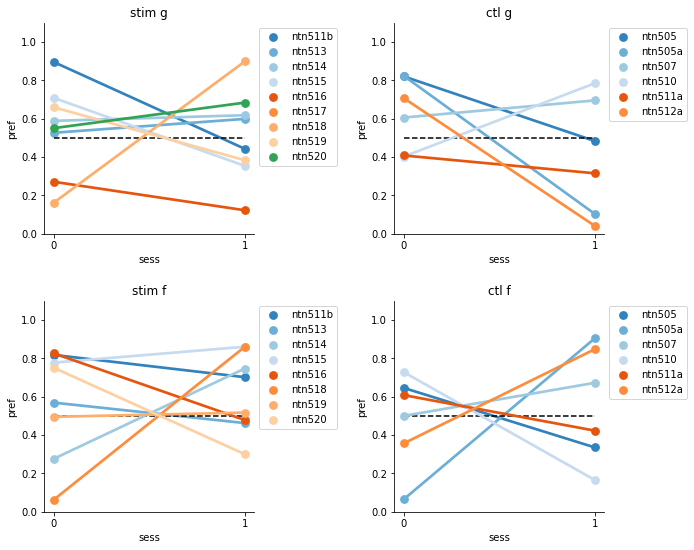

In [16]:
#select only the second pretesting day
ctl_sat_pretesting.total_left_licks = ctl_sat_pretesting.total_left_licks.iloc[:,-2:]
ctl_sat_pretesting.total_left_licks.columns = [0,1]
ctl_sat_pretesting.total_right_licks = ctl_sat_pretesting.total_right_licks.iloc[:,-2:]
ctl_sat_pretesting.total_right_licks.columns = [0,1]

pretest_val_plots(stim_g=stim_sat_pretesting, ctl_g=ctl_sat_pretesting, 
                  stim_f=stim_sat_f_pretesting, ctl_f=ctl_sat_f_pretesting)

### format and save data

In [18]:
df, dft = format_final_dataset(ctl_train_g = ctl_sat_training, ctl_test_g = ctl_sat, 
                         ctl_train_f = ctl_sat_f_training, ctl_test_f = ctl_sat_f, 
                         stim_train_g = stim_sat_training, stim_test_g = stim_sat, 
                         both_us = False, to_prune = True)

df.to_csv(pre_processed/'unused'/'sated1'/'total_licks_sated1.csv')
dft.to_csv(pre_processed/'unused'/'sated1'/'lick_times_sated1.csv')

display(df)
display(dft)

CS+         CS-  sess sex    side  \
US      Chr2  mouse   phase    day CS                                         
fat     False ntn505a test     0   +    Grape      Cherry   0.0   F   right   
                                   -    Grape      Cherry   0.0   F    left   
                               1   +    Grape      Cherry   0.0   F    left   
                                   -    Grape      Cherry   0.0   F   right   
                      training 0   +    Grape      Cherry   1.0   F  center   
...                                       ...         ...   ...  ..     ...   
glucose True  ntn520  training 0   -   Orange  Lemon-Lime   0.0   F  center   
                               1   +   Orange  Lemon-Lime   0.0   F  center   
                                   -   Orange  Lemon-Lime   1.0   F  center   
                               2   +   Orange  Lemon-Lime   1.0   F  center   
                                   -   Orange  Lemon-Lime   0.0   F  center   

                                      total_licks  
US      Chr2  mouse   phase    day CS              
fat     False ntn505a test     0   +         45.0  
                                   -       1405.0  
                               1   +       1755.0  
                                   -         59.0  
                      training 0   +        205.0  
...                                           ...  
glucose True  ntn520  training 0   -         36.0  
                               1   +         30.0  
                                   -         84.0  
                               2   +        108.0  
                                   -        115.0  

[130 rows x 6 columns]

sess     time sex     CS+  \
US      Chr2  mouse   phase    day CS lick_number                              
fat     False ntn505a test     0   +  0               0   224.06   F   Grape   
                                      1               0   224.31   F   Grape   
                                      2               0   224.53   F   Grape   
                                      3               0   224.64   F   Grape   
                                      4               0   224.73   F   Grape   
...                                                 ...      ...  ..     ...   
glucose True  ntn520  training 2   -  110             0  1652.21   F  Orange   
                                      111             0  1763.52   F  Orange   
                                      112             0  1763.62   F  Orange   
                                      113             0  1763.70   F  Orange   
                                      114             0  1763.89   F  Orange   

                                                          CS-    side  
US      Chr2  mouse   phase    day CS lick_number                      
fat     False ntn505a test     0   +  0                Cherry   right  
                                      1                Cherry   right  
                                      2                Cherry   right  
                                      3                Cherry   right  
                                      4                Cherry   right  
...                                                       ...     ...  
glucose True  ntn520  training 2   -  110          Lemon-Lime  center  
                                      111          Lemon-Lime  center  
                                      112          Lemon-Lime  center  
                                      113          Lemon-Lime  center  
                                      114          Lemon-Lime  center  

[30845 rows x 6 columns]

## extinction (round 1)

In [19]:
# defining the data location
fpath_ctl_ext = raw_data/'unused'/'extinction1'/'ctl'
fpath_stim_ext = raw_data/'unused'/'extinction1'/'stim'


# necessary variables related to experiment setup for controls
ctl_ext_setup = fpath_ctl_ext/'ctl_extinction_setup.csv'
stim_ext_setup = fpath_stim_ext/'stim_extinction_setup.csv'


print('loading ctl...')
ctl_ext_training= FNCData(fpath_ctl_ext, ['ntn'], 'training', ctl_ext_setup, n_sessions=2, loglevel = 0)
ctl_ext_pretesting= FNCData(fpath_ctl_ext, ['ntn'], 'pretesting', ctl_ext_setup, n_sessions=2, loglevel = 0)
ctl_ext= FNCData(fpath_ctl_ext, ['ntn'], 'testing', ctl_ext_setup, loglevel = 0)

print('loading stim...')
stim_ext_training= FNCData(fpath_stim_ext, ['ntn'], 'training', stim_ext_setup, n_sessions=2, loglevel = 0)
stim_ext_pretesting= FNCData(fpath_stim_ext, ['ntn'], 'pretesting', stim_ext_setup, n_sessions=2, loglevel = 0)
stim_ext= FNCData(fpath_stim_ext, ['ntn'], 'testing', stim_ext_setup, loglevel = 0)


loading ctl...
loading stim...


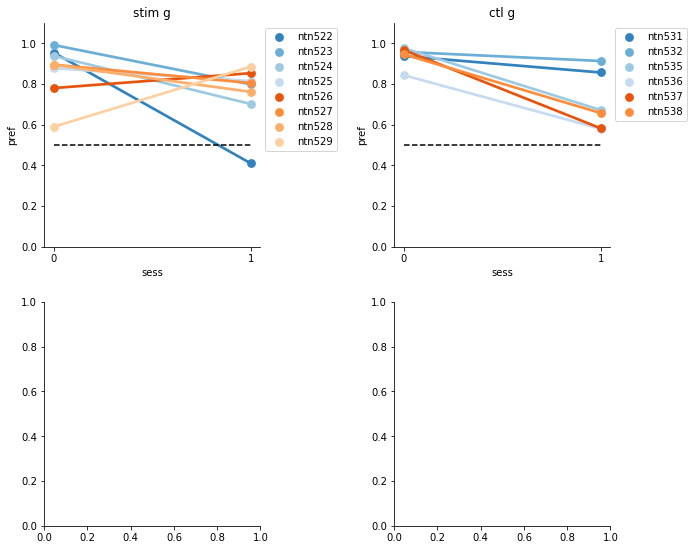

In [20]:
pretest_val_plots(stim_g=stim_ext_pretesting, ctl_g=ctl_ext_pretesting)

In [21]:
df, dft = format_final_dataset(ctl_train_g = ctl_ext_training, ctl_test_g = ctl_ext,
                         stim_train_g = stim_ext_training, stim_test_g = stim_ext, 
                         both_us = False, to_prune = True)

df.to_csv(pre_processed/'unused'/'extinction1'/'total_licks_extinction1.csv')
dft.to_csv(pre_processed/'unused'/'extinction1'/'lick_times_extinction1.csv')

display(df)
display(dft)

CS+    CS-  sess sex    side  \
US      Chr2  mouse  phase    day CS                                    
glucose False ntn531 test     0   +   Cherry  Grape   0.0   M   right   
                                  -   Cherry  Grape   0.0   M    left   
                              1   +   Cherry  Grape   0.0   M    left   
                                  -   Cherry  Grape   0.0   M   right   
                              2   +   Cherry  Grape   0.0   M   right   
...                                      ...    ...   ...  ..     ...   
        True  ntn529 training 0   -   Cherry  Grape   0.0   F  center   
                              1   +   Cherry  Grape   0.0   F  center   
                                  -   Cherry  Grape   1.0   F  center   
                              2   +   Cherry  Grape   1.0   F  center   
                                  -   Cherry  Grape   0.0   F  center   

                                      total_licks  
US      Chr2  mouse  phase    day CS               
glucose False ntn531 test     0   +        1560.0  
                                  -         616.0  
                              1   +         352.0  
                                  -        1801.0  
                              2   +        1587.0  
...                                           ...  
        True  ntn529 training 0   -         239.0  
                              1   +         214.0  
                                  -         329.0  
                              2   +         137.0  
                                  -         254.0  

[252 rows x 6 columns]

sess     time sex     CS+  \
US      Chr2  mouse  phase    day CS lick_number                              
glucose False ntn531 test     0   +  0               0    55.36   M  Cherry   
                                     1               0    55.48   M  Cherry   
                                     2               0    55.62   M  Cherry   
                                     3               0    55.76   M  Cherry   
                                     4               0    55.90   M  Cherry   
...                                                ...      ...  ..     ...   
        True  ntn529 training 2   -  249             0  1771.76   F  Cherry   
                                     250             0  1772.04   F  Cherry   
                                     251             0  1772.28   F  Cherry   
                                     252             0  1772.93   F  Cherry   
                                     253             0  1773.17   F  Cherry   

                                                    CS-    side  
US      Chr2  mouse  phase    day CS lick_number                 
glucose False ntn531 test     0   +  0            Grape   right  
                                     1            Grape   right  
                                     2            Grape   right  
                                     3            Grape   right  
                                     4            Grape   right  
...                                                 ...     ...  
        True  ntn529 training 2   -  249          Grape  center  
                                     250          Grape  center  
                                     251          Grape  center  
                                     252          Grape  center  
                                     253          Grape  center  

[133857 rows x 6 columns]

## extinction (round 2) - pretraining


In [22]:
# defining the data location
fpath_ctl_ext2_pre = raw_data/'unused'/'extinction2_pretraining'/'ctl'
fpath_stim_ext2_pre = raw_data/'unused'/'extinction2_pretraining'/'stim'


# necessary variables related to experiment setup for controls
ctl_ext2_pretrain_setup = fpath_ctl_ext2_pre/'ctl_extinction2_pretrain_setup.csv'
stim_ext2_pretrain_setup = fpath_stim_ext2_pre/'stim_extinction2_pretrain_setup.csv'


print('loading ctl...')
ctl_ext2_pretrain_pretest = FNCData(fpath_ctl_ext2_pre, ['ntn'], 'pretesting', ctl_ext2_pretrain_setup, n_sessions=2, loglevel = 0)
ctl_ext2_pretrain = FNCData(fpath_ctl_ext2_pre, ['ntn'], 'testing', ctl_ext2_pretrain_setup, loglevel = 0)

print('loading stim...')
stim_ext2_pretrain_pretest = FNCData(fpath_stim_ext2_pre, ['ntn'], 'pretesting', stim_ext2_pretrain_setup, n_sessions=2, loglevel = 0)
stim_ext2_pretrain = FNCData(fpath_stim_ext2_pre, ['ntn'], 'testing', stim_ext2_pretrain_setup, loglevel = 0)

loading ctl...
loading stim...


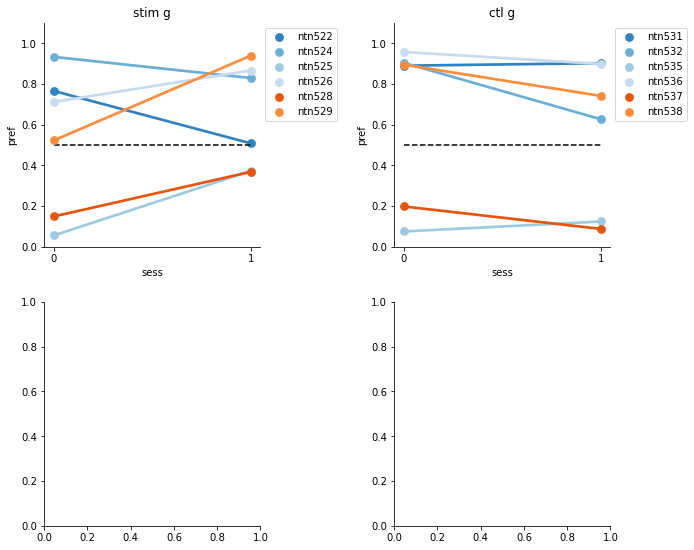

In [23]:
pretest_val_plots(stim_g=stim_ext2_pretrain_pretest, ctl_g=ctl_ext2_pretrain_pretest )

In [24]:
df, dft = format_final_dataset(ctl_test_g = ctl_ext2_pretrain, stim_test_g = stim_ext2_pretrain, 
                              both_us = False, to_prune = False)

df.to_csv(pre_processed/'unused'/'extinction2_pretraining'/'total_licks_extinction2_pretraining.csv')
dft.to_csv(pre_processed/'unused'/'extinction2_pretraining'/'lick_times_extinction2_pretraining.csv')

display(df)
display(dft)

('ntn524', 1, 'right')


side  total_licks sex     CS+     CS-  \
US      Chr2  mouse  phase day CS                                           
glucose False ntn531 test  0   -    left         18.0   M  Cherry   Grape   
                               +   right       1138.0   M  Cherry   Grape   
                           1   +    left       1206.0   M  Cherry   Grape   
                               -   right         38.0   M  Cherry   Grape   
              ntn532 test  0   -    left         58.0   M  Cherry   Grape   
                               +   right       1047.0   M  Cherry   Grape   
                           1   +    left       1115.0   M  Cherry   Grape   
                               -   right         10.0   M  Cherry   Grape   
              ntn535 test  0   -    left       1230.0   M   Grape  Cherry   
                               +   right         26.0   M   Grape  Cherry   
                           1   +    left          9.0   M   Grape  Cherry   
                               -   right       1149.0   M   Grape  Cherry   
              ntn536 test  0   -    left         22.0   F  Cherry   Grape   
                               +   right        343.0   F  Cherry   Grape   
                           1   +    left        494.0   F  Cherry   Grape   
                               -   right         96.0   F  Cherry   Grape   
              ntn537 test  0   -    left        342.0   F   Grape  Cherry   
                               +   right        211.0   F   Grape  Cherry   
                           1   +    left         50.0   F   Grape  Cherry   
                               -   right        708.0   F   Grape  Cherry   
              ntn538 test  0   +    left         26.0   F   Grape  Cherry   
                               -   right        320.0   F   Grape  Cherry   
                           1   -    left        484.0   F   Grape  Cherry   
                               +   right         19.0   F   Grape  Cherry   
        True  ntn522 test  0   -    left         44.0   M  Cherry   Grape   
                               +   right        206.0   M  Cherry   Grape   
                           1   +    left        771.0   M  Cherry   Grape   
                               -   right         18.0   M  Cherry   Grape   
              ntn524 test  0   +    left          1.0   F   Grape  Cherry   
                               -   right          1.0   F   Grape  Cherry   
                           1   -    left          0.0   F   Grape  Cherry   
                               +   right          0.0   F   Grape  Cherry   
              ntn525 test  0   +    left         27.0   F   Grape  Cherry   
                               -   right        509.0   F   Grape  Cherry   
                           1   -    left        231.0   F   Grape  Cherry   
                               +   right        134.0   F   Grape  Cherry   
              ntn526 test  0   -    left        283.0   F   Grape  Cherry   
                               +   right        108.0   F   Grape  Cherry   
                           1   +    left         38.0   F   Grape  Cherry   
                               -   right        546.0   F   Grape  Cherry   
              ntn528 test  0   +    left        391.0   F  Cherry   Grape   
                               -   right         87.0   F  Cherry   Grape   
                           1   -    left         92.0   F  Cherry   Grape   
                               +   right        653.0   F  Cherry   Grape   
              ntn529 test  0   +    left        139.0   F  Cherry   Grape   
                               -   right          7.0   F  Cherry   Grape   
                           1   -    left         51.0   F  Cherry   Grape   
                               +   right        229.0   F  Cherry   Grape   

                                   sess  
US      Chr2  mouse  phase day CS        
glucose False ntn531 test  0   -      0  
                               +      0  
                 

side     time sex     CS+  \
US      Chr2  mouse  phase day CS lick_number                               
glucose False ntn531 test  0   +  0            right    60.02   M  Cherry   
                                  1            right    60.13   M  Cherry   
                                  2            right    60.26   M  Cherry   
                                  3            right    60.50   M  Cherry   
                                  4            right    60.64   M  Cherry   
...                                              ...      ...  ..     ...   
        True  ntn529 test  1   -  46            left  1762.23   F  Cherry   
                                  47            left  1762.30   F  Cherry   
                                  48            left  1762.48   F  Cherry   
                                  49            left  1762.85   F  Cherry   
                                  50            left  1763.02   F  Cherry   

                                                 CS-  sess  
US      Chr2  mouse  phase day CS lick_number               
glucose False ntn531 test  0   +  0            Grape     0  
                                  1            Grape     0  
                                  2            Grape     0  
                                  3            Grape     0  
                                  4            Grape     0  
...                                              ...   ...  
        True  ntn529 test  1   -  46           Grape     0  
                                  47           Grape     0  
                                  48           Grape     0  
                                  49           Grape     0  
                                  50           Grape     0  

[14725 rows x 6 columns]

## sated (round 2)

In [25]:
# fld = raw_data/'sated_redo'/'stim'/'stim_sated_redo_glucose'/'pretesting'/'20220915'/'raw'
# ams = list(filter(lambda x: 'AM' in x.name, list(fld.iterdir())))

# for f in ams:
#     am_sess = pull_multiple(f)
#     new_loc = f.parent.parent/f.name
#     if not new_loc.exists(): os.mkdir(new_loc)
#     for i,v in am_sess.items():
#         v = v[0]
#         a, b, l, r = v['a'].copy(), v['b'].copy(), v['l'].copy(), v['r'].copy()
#         v['b'] = a
#         v['a'] = b
#         v['l'] = r
#         v['r'] = l
#         fname = new_loc/f"Subject_{v['subject']}_Experiment__Group_.txt"
#         write_data( fname, v)

In [26]:
# defining the data location
fpath_stim_glucose = raw_data/'sated2'/'stim'/'stim_sated_redo_glucose'
fpath_stim_fat = raw_data/'sated2'/'stim'/'stim_sated_redo_fat'

# necessary variables related to experiment setup for controls
stim_g_setup = fpath_stim_glucose/'stim_sated_redo_glucose_setup.csv'
stim_f_setup = fpath_stim_fat/'stim_sated_redo_fat_setup.csv'


print('loading glucose stim')
training = FNCData(fpath_stim_glucose,['ntn'],'training', stim_g_setup, n_sessions=2, loglevel=0)
testing = FNCData(fpath_stim_glucose,['ntn'],'testing', stim_g_setup, loglevel=0)
pretesting = FNCData(fpath_stim_glucose,['ntn'],'pretesting', stim_g_setup, n_sessions=2, loglevel=0)

print('loading fat stim')
fat_stim_training = FNCData(fpath_stim_fat,['ntn'],'training', stim_f_setup, n_sessions=2, loglevel=0)
fat_stim = FNCData(fpath_stim_fat,['ntn'],'testing', stim_f_setup, loglevel=0)
stim_fat_pretesting = FNCData(fpath_stim_fat,['ntn'],'pretesting', stim_f_setup, n_sessions=2, loglevel=0)

loading glucose stim
loading fat stim


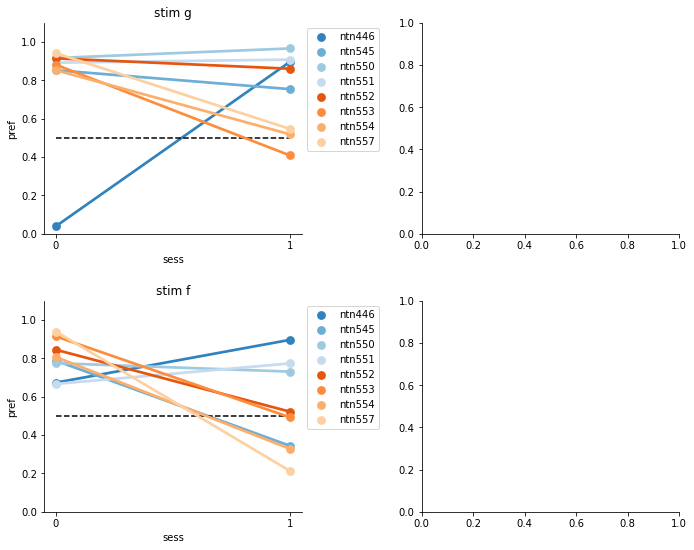

In [27]:
# pretesting validation
pretest_val_plots(stim_g=pretesting, stim_f=stim_fat_pretesting)

In [28]:
df, dft = format_final_dataset(stim_train_g = training, stim_test_g = testing, 
                               stim_train_f = fat_stim_training, stim_test_f = fat_stim,
                               both_us = False, to_prune = True)

df.to_csv(pre_processed/'sated2'/'total_licks_sated2.csv')
dft.to_csv(pre_processed/'sated2'/'lick_times_sated2.csv')

display(df)
display(dft)

CS+     CS-  sess sex    side  \
US      Chr2 mouse  phase    day CS                                     
fat     True ntn446 test     0   +   orange    lime   0.0   F    left   
                                 -   orange    lime   0.0   F   right   
                             1   +   orange    lime   0.0   F   right   
                                 -   orange    lime   0.0   F    left   
                    training 0   +   orange    lime   1.0   F  center   
...                                     ...     ...   ...  ..     ...   
glucose True ntn557 training 0   -    grape  cherry   0.0   F  center   
                             1   +    grape  cherry   0.0   F  center   
                                 -    grape  cherry   1.0   F  center   
                             2   +    grape  cherry   1.0   F  center   
                                 -    grape  cherry   0.0   F  center   

                                     total_licks  
US      Chr2 mouse  phase    day CS               
fat     True ntn446 test     0   +         125.0  
                                 -         239.0  
                             1   +          33.0  
                                 -         234.0  
                    training 0   +         162.0  
...                                          ...  
glucose True ntn557 training 0   -         100.0  
                             1   +         183.0  
                                 -         150.0  
                             2   +          74.0  
                                 -         100.0  

[140 rows x 6 columns]

sess     time sex     CS+  \
US      Chr2 mouse  phase    day CS lick_number                              
fat     True ntn446 test     0   +  0               0    31.44   F  orange   
                                    1               0    83.21   F  orange   
                                    2               0    83.39   F  orange   
                                    3               0    83.59   F  orange   
                                    4               0    83.80   F  orange   
...                                               ...      ...  ..     ...   
glucose True ntn557 training 2   -  95              0  1718.17   F   grape   
                                    96              0  1718.34   F   grape   
                                    97              0  1718.53   F   grape   
                                    98              0  1718.83   F   grape   
                                    99              0  1719.15   F   grape   

                                                    CS-    side  
US      Chr2 mouse  phase    day CS lick_number                  
fat     True ntn446 test     0   +  0              lime    left  
                                    1              lime    left  
                                    2              lime    left  
                                    3              lime    left  
                                    4              lime    left  
...                                                 ...     ...  
glucose True ntn557 training 2   -  95           cherry  center  
                                    96           cherry  center  
                                    97           cherry  center  
                                    98           cherry  center  
                                    99           cherry  center  

[33779 rows x 6 columns]

## extinction (round 3)

In [29]:
# fld = raw_data/'extinction3'/'ctl'/'training'/'20221022'/'20221022_adm602_adm604_adm606_adm608_adm609_adm614_adm615_AM_train1'/'raw'
# dest_fld = raw_data/'extinction3'/'ctl'/'training'/'20221023'/'20221023_adm602_adm604_adm606_adm608_adm609_adm614_adm615_AM_train2'

# res = pull_multiple(fld, use_most_recent = False)
# for k,v in res.items():
#     fname1 = fld.parent/f"Subject_{v[0][0]['subject']}_Experiment__Group_.txt"
#     write_data( fname1, v[0][0])
#     fname2 = dest_fld/f"Subject_{v[0][0]['subject']}_Experiment__Group_.txt"
#     write_data( fname2, v[0][1])

In [119]:
# defining the data location
fpath_ctl_ext = raw_data/'extinction3'/'ctl'
fpath_stim_ext = raw_data/'extinction3'/'stim'


# necessary variables related to experiment setup for controls
ctl_ext_setup = fpath_ctl_ext/'ctl_extinction_setup.csv'
stim_ext_setup = fpath_stim_ext/'stim_extinction_setup.csv'


print('loading ctl...')
ctl_ext_training= FNCData(fpath_ctl_ext, ['adm', 'ntn'], 'training', ctl_ext_setup, n_sessions=2, loglevel = 0)
ctl_ext_pretesting= FNCData(fpath_ctl_ext, ['adm', 'ntn'], 'pretesting', ctl_ext_setup, n_sessions=2, loglevel = 0)
ctl_ext= FNCData(fpath_ctl_ext, ['adm', 'ntn'], 'testing', ctl_ext_setup, loglevel = 0)

print('loading stim...')
stim_ext_training= FNCData(fpath_stim_ext, ['adm', 'ntn'], 'training', stim_ext_setup, n_sessions=2, loglevel = 0)
stim_ext_pretesting= FNCData(fpath_stim_ext, ['adm', 'ntn'], 'pretesting', stim_ext_setup, n_sessions=2, loglevel = 0)
stim_ext= FNCData(fpath_stim_ext, ['adm', 'ntn'], 'testing', stim_ext_setup, loglevel = 0)

loading ctl...
loading stim...


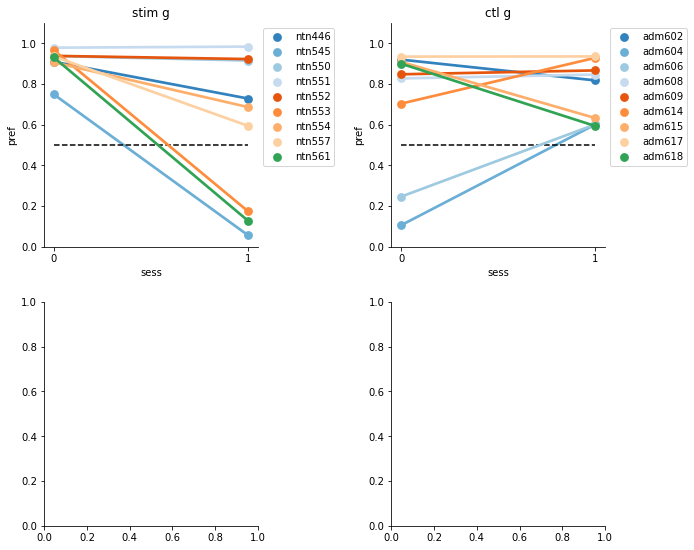

In [120]:
# pretesting validation
pretest_val_plots( ctl_g=ctl_ext_pretesting, stim_g=stim_ext_pretesting)

In [121]:
(get_pretest_pref(stim_ext_pretesting).set_index(['mouse','sess']).pref.unstack('sess')>0.5).all(axis=1)

mouse
ntn446     True
ntn545    False
ntn550     True
ntn551     True
ntn552     True
ntn553    False
ntn554     True
ntn557     True
ntn561    False
dtype: bool

In [122]:
(get_pretest_pref(ctl_ext_pretesting).set_index(['mouse','sess']).pref.unstack('sess')>0.5).all(axis=1)

mouse
adm602     True
adm604    False
adm606    False
adm608     True
adm609     True
adm614     True
adm615     True
adm617     True
adm618     True
dtype: bool

In [127]:
ctl_ext.total_right_licks

cumm_sess,0,1,2,3,4,5
mouse,,,,,,
adm602,468.0,287.0,0.0,0.0,205.0,852.0
adm604,395.0,606.0,1111.0,923.0,780.0,868.0
adm606,26.0,31.0,49.0,37.0,58.0,78.0
adm608,37.0,160.0,81.0,172.0,115.0,484.0
adm609,442.0,1193.0,242.0,767.0,269.0,807.0
adm614,39.0,186.0,103.0,329.0,156.0,109.0
adm615,1.0,0.0,202.0,546.0,363.0,493.0
adm617,824.0,996.0,1273.0,1391.0,1484.0,1507.0
adm618,455.0,1029.0,562.0,450.0,486.0,459.0


In [133]:
df, dft = format_final_dataset(ctl_train_g = ctl_ext_training, ctl_test_g =ctl_ext,
                               stim_train_g = stim_ext_training, stim_test_g = stim_ext, 
                               both_us = False, to_prune = True, 
                               drop = ['ntn553','ntn561','ntn545', 'adm606', 'adm604'])

df.to_csv(pre_processed/'extinction3'/'total_licks_extinction3.csv')
dft.to_csv(pre_processed/'extinction3'/'lick_times_extinction3.csv')

display(df)
display(dft)

('adm602', 2, 'right')
('adm602', 3, 'right')
('adm615', 1, 'right')
('ntn446', 3, 'right')


CS+    CS-  sess sex    side  \
US      Chr2  mouse  phase    day CS                                    
glucose False adm608 test     0   +   Cherry  Grape   0.0   F    left   
                                  -   Cherry  Grape   0.0   F   right   
                              1   +   Cherry  Grape   0.0   F   right   
                                  -   Cherry  Grape   0.0   F    left   
                              2   +   Cherry  Grape   0.0   F    left   
...                                      ...    ...   ...  ..     ...   
        True  ntn557 training 0   -   Cherry  Grape   0.0   F  center   
                              1   +   Cherry  Grape   0.0   F  center   
                                  -   Cherry  Grape   1.0   F  center   
                              2   +   Cherry  Grape   1.0   F  center   
                                  -   Cherry  Grape   0.0   F  center   

                                      total_licks  
US      Chr2  mouse  phase    day CS               
glucose False adm608 test     0   +         414.0  
                                  -          37.0  
                              1   +         160.0  
                                  -         423.0  
                              2   +         826.0  
...                                           ...  
        True  ntn557 training 0   -         103.0  
                              1   +         250.0  
                                  -         189.0  
                              2   +         243.0  
                                  -         195.0  

[162 rows x 6 columns]

sess    time sex     CS+  \
US      Chr2  mouse  phase    day CS lick_number                             
glucose False adm608 test     0   +  0               0   24.06   F  Cherry   
                                     1               0   24.15   F  Cherry   
                                     2               0   24.24   F  Cherry   
                                     3               0   68.22   F  Cherry   
                                     4               0   68.31   F  Cherry   
...                                                ...     ...  ..     ...   
        True  ntn557 training 2   -  190             0  516.58   F  Cherry   
                                     191             0  516.60   F  Cherry   
                                     192             0  516.63   F  Cherry   
                                     193             0  517.10   F  Cherry   
                                     194             0  517.36   F  Cherry   

                                                    CS-    side  
US      Chr2  mouse  phase    day CS lick_number                 
glucose False adm608 test     0   +  0            Grape    left  
                                     1            Grape    left  
                                     2            Grape    left  
                                     3            Grape    left  
                                     4            Grape    left  
...                                                 ...     ...  
        True  ntn557 training 2   -  190          Grape  center  
                                     191          Grape  center  
                                     192          Grape  center  
                                     193          Grape  center  
                                     194          Grape  center  

[71235 rows x 6 columns]

## extinction (round 4)

In [109]:
# defining the data location
fpath_ctl_ext = raw_data/'extinction4'/'ctl'
fpath_stim_ext = raw_data/'extinction4'/'stim'


# necessary variables related to experiment setup for controls
ctl_ext_setup = fpath_ctl_ext/'ctl_extinction_setup.csv'
stim_ext_setup = fpath_stim_ext/'stim_extinction_setup.csv'


print('loading ctl...')
ctl_ext_training= FNCData(fpath_ctl_ext, ['adm', 'agv'], 'training', ctl_ext_setup, n_sessions=2, loglevel = 1)
ctl_ext_pretesting= FNCData(fpath_ctl_ext, ['adm', 'agv'], 'pretesting', ctl_ext_setup, n_sessions=2, loglevel = 1)
ctl_ext= FNCData(fpath_ctl_ext, ['adm', 'agv'], 'testing', ctl_ext_setup, loglevel = 1)

print('loading stim...')
stim_ext_training= FNCData(fpath_stim_ext, ['adm', 'agv'], 'training', stim_ext_setup, n_sessions=2, loglevel = 1)
stim_ext_pretesting= FNCData(fpath_stim_ext, ['adm', 'agv'], 'pretesting', stim_ext_setup, n_sessions=2, loglevel = 1)
stim_ext= FNCData(fpath_stim_ext, ['adm', 'agv'], 'testing', stim_ext_setup, loglevel = 1)

loading ctl...
loading stim...


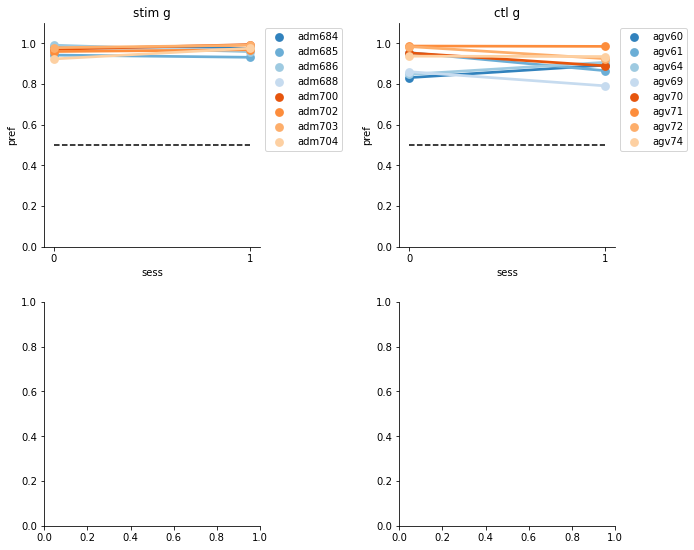

In [110]:
pretest_val_plots( ctl_g=ctl_ext_pretesting, stim_g=stim_ext_pretesting)

In [111]:
get_pretest_pref(ctl_ext_pretesting).set_index(['mouse','sess']).pref.unstack('sess').all(axis=1)

mouse
agv60    True
agv61    True
agv64    True
agv69    True
agv70    True
agv71    True
agv72    True
agv74    True
dtype: bool

In [112]:
get_pretest_pref(stim_ext_pretesting).set_index(['mouse','sess']).pref.unstack('sess').all(axis=1)

mouse
adm684    True
adm685    True
adm686    True
adm688    True
adm700    True
adm702    True
adm703    True
adm704    True
dtype: bool

In [113]:
df, dft = format_final_dataset(ctl_train_g = ctl_ext_training, ctl_test_g =ctl_ext,
                               stim_train_g = stim_ext_training, stim_test_g = stim_ext, 
                               both_us = False, to_prune = True)

df.to_csv(pre_processed/'extinction4'/'total_licks_extinction4.csv')
dft.to_csv(pre_processed/'extinction4'/'lick_times_extinction4.csv')

display(df)
display(dft)

CS+     CS-  sess sex    side  \
US      Chr2  mouse  phase    day CS                                     
glucose False agv61  test     0   +    grape  cherry   0.0   F   right   
                                  -    grape  cherry   0.0   F    left   
                              1   +    grape  cherry   0.0   F    left   
                                  -    grape  cherry   0.0   F   right   
                              2   +    grape  cherry   0.0   F   right   
...                                      ...     ...   ...  ..     ...   
        True  adm704 training 0   -   cherry   grape   0.0   F  center   
                              1   +   cherry   grape   0.0   F  center   
                                  -   cherry   grape   1.0   F  center   
                              2   +   cherry   grape   1.0   F  center   
                                  -   cherry   grape   0.0   F  center   

                                      total_licks  
US      Chr2  mouse  phase    day CS               
glucose False agv61  test     0   +         364.0  
                                  -         608.0  
                              1   +         652.0  
                                  -         180.0  
                              2   +        1049.0  
...                                           ...  
        True  adm704 training 0   -         280.0  
                              1   +         656.0  
                                  -         589.0  
                              2   +         610.0  
                                  -         524.0  

[252 rows x 6 columns]

sess    time sex     CS+  \
US      Chr2  mouse  phase    day CS lick_number                             
glucose False agv61  test     0   +  0               0    0.18   F   grape   
                                     1               0    0.27   F   grape   
                                     2               0    0.39   F   grape   
                                     3               0    0.48   F   grape   
                                     4               0    0.59   F   grape   
...                                                ...     ...  ..     ...   
        True  adm704 training 2   -  519             0  535.42   F  cherry   
                                     520             0  535.55   F  cherry   
                                     521             0  535.68   F  cherry   
                                     522             0  535.82   F  cherry   
                                     523             0  535.97   F  cherry   

                                                     CS-    side  
US      Chr2  mouse  phase    day CS lick_number                  
glucose False agv61  test     0   +  0            cherry   right  
                                     1            cherry   right  
                                     2            cherry   right  
                                     3            cherry   right  
                                     4            cherry   right  
...                                                  ...     ...  
        True  adm704 training 2   -  519           grape  center  
                                     520           grape  center  
                                     521           grape  center  
                                     522           grape  center  
                                     523           grape  center  

[174875 rows x 6 columns]